# Лабораторная работа по вычислительной математике

    Потапов Анатолий 4115

# Это - ноутбук с octave kernel

Octave provides lsode for solving differential equations.  For more
information try 'help lsode'.  Matlab-compatible ODE functions are
provided by the odepkg package.  See
<http://octave.sourceforge.net/odepkg/>.

In [ ]:
pkg install odepkg-0.8.5.tar.gz

Одномерное уравнение теплопроводности (диффузии) с постоянным коэффициентом теплопроводности можно записать в виде:

$$
\frac{\partial u}{ \partial t} = a \frac{\partial^2 u}{\partial x^2} + f(x,t),
$$

где a>0 - коэффициент теплопроводности.

Начально-краевая задача в ограниченной области 0< x < L включает ....

# 1. Двухслойная разностная схема

*** Параметры ***:

In [30]:
T = 1.0; % Время интегрирования
max_X = 3.1415926 / 2.0; % Область пространства
min_X = -max_X;
precision = 0.01; % Разрешение 
D = 1; % Коэффициент теплопроводности (a)
q = 0.5; % Параметр явная/неявная схема
M = round((max_X-min_X)/sqrt(precision)); % Число узлов на сетке (X)
h = max_X/M; % Шаг сетки (X)
tau = 0.005; % Шаг по времени
N = round(T/tau); % Числоузлов сетки по времени

In [31]:
function rval = func(x)
rval = 3*x*x;
endfunction

*** Параболическое числом Куранта ***:

In [32]:
sigma = D*tau/h^2;
sigma

sigma =  1.9474


In [33]:
xset = -M*h:h:M*h; % координатные значения сетки
tset = 0:tau:N*tau; % временные значения сетки

In [34]:
X = []; 
Y = [];

for i = 1:2*M+1
    for j = 1:N+1
        X(i, j) = xset(i);      
    end
end

for i = 1:2*M+1
    for j = 1:N+1
        Y(i, j) = tset(j);
    end
end

In [35]:
psol = []  % точное (аналитическое) решение
for ii = 1:2*M+1
    for jj = 1:N+1
        x = xset(ii);
        t = tset(jj);
        psol(ii,jj) = t*t*t + exp(-t)*sin(x);
    end
end

psol = [](0x0)


In [36]:
size(psol)

ans =

    63   201



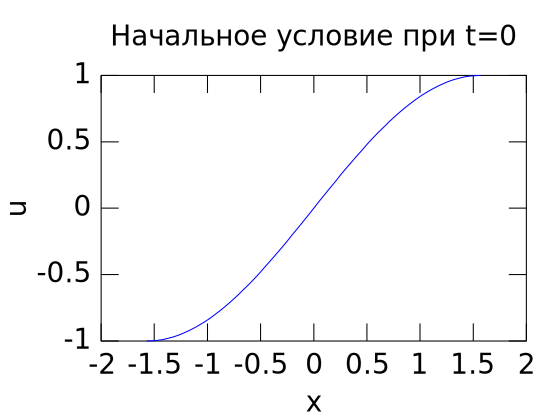

In [37]:
figure
plot(xset, psol(:,1));
title('Начальное условие при t=0');
xlabel('x');
ylabel('u');

In [40]:
A = [];
f = [];
A(1, 1) = -3;
A(1, 2) = 4;
A(1, 3) = -1;
A(2*M+1, 2*M+1) = 3;
A(2*M+1, 2*M) = -4;
A(2*M+1, 2*M-1) = 1;
for i = 2:2*M
    A(i, i-1) = -sigma*q;
    A(i, i) = (1+2*q*sigma);
    A(i, i+1) = -sigma*q;
end

In [42]:
nsol = [];
nsol(:, 1) = psol(:, 1); % Начальные условия по времени

for i = 1:N
    t = tset(i);
    f(1) = 0;
    f((2*M)+1) = 0;
    for j = 2:(2*M)
        fnc = func(t);    
        f(j) = (1-q)*sigma*(nsol(j-1, i)+nsol(j+1, i)) + (1+2*(q-1)*sigma)*nsol(j, i) + tau*fnc;
    end
    nsol(:, i+1) = A\transpose(f);
    %figure
    %plot(xset, nsol(:, i+1))
    %hold on;
    %plot(xset, psol(:, i+1));
    %Раскомментировать четыре предыдущие строчки  - это задание 15d,
    %нарисует очень много графиков сравнения точного и численного решения
    %на каждом шаге
   
end

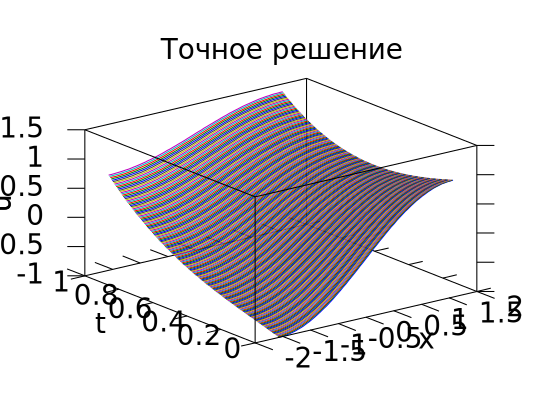

In [44]:
figure
plot3(X, Y, psol);
title('Точное решение');
xlabel('x');
ylabel('t');
zlabel('u');

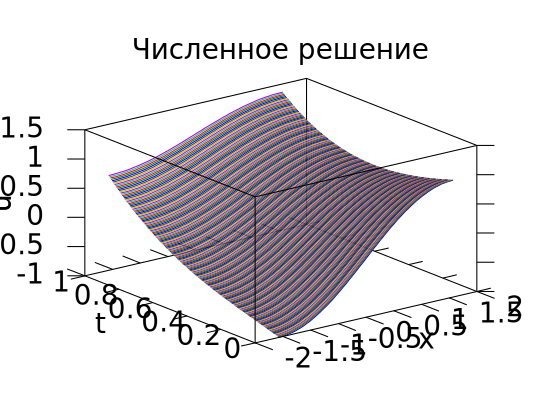

In [45]:
figure
plot3(X, Y, nsol);
title('Численное решение');
xlabel('x');
ylabel('t');
zlabel('u');

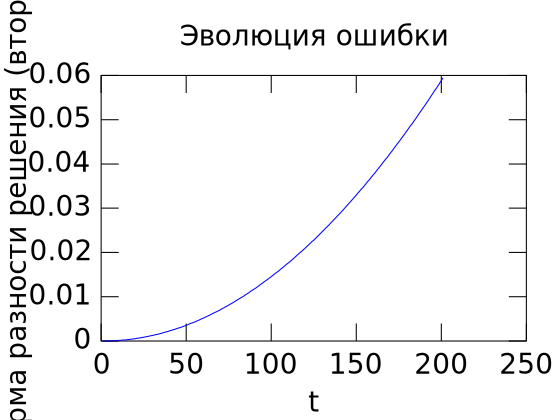

In [46]:
dnorm = [];
for i=1:N+1
    a = psol(:, i)-nsol(:, i);
    dnorm(i) = norm(a, 2);%вторая норма
end
figure
plot(1:N+1, dnorm);
title('Эволюция ошибки');
xlabel('t');
ylabel('Норма разности решения (вторая)');
dnorm;

# 2. Метод прямых

In [47]:
function du = eq5(t, u)
L = 3.14159/2;
M = length(u);
h = L/(M+1);
D = 1;
p = D/h^2;
du = zeros(M, 1);
et = exp(t);
fi0 = 4*u(1)/3 - u(2)/3 - 2*h*cosh(t)/3;
du(1) = p*(fi0-2*u(1)+u(2)) + et*sin(h);
fiL = 4*u(M)/3 - u(M-1)/3;
du(M) = p*(u(M-1) - 2*u(M) + fiL) + et*sin(h);
for i=2:M-1
    x = i*h;
    du(i) = p*(u(i-1)-2*u(i)+2*u(i+1)) + et*sin(x);
end
endfunction

In [48]:
pkg load odepkg

In [ ]:
L = 3.14159/2;
h_like = 0.1;
M = round(L/h_like);
h = L/M;
T = 0.1;
xset = [];
xset = h:h:(M-1)*h;
%shape(xset)
u0 = transpose(sin(xset));
res = ode45(@eq5, [0 T], u0); %Можно убедиться, что явный метод Рунге-Кутта
%даёт экспоненциально нарастающую ошибку. Плохо.
%res = ode23tb(@eq5, [0 T], u0);
psol = [];
i = 1;
for t=res.x
    j = 1;
    for x = xset
    psol(j, i) = cosh(t)*sin(x);
    j = j+1;
    end
    i = i+1;
end
res
figure
plot(xset, u0)
hold on;
length(res.x)
plot(xset, res.y(:, res.x(length(res.x))));
title('Начальное и конечное решения');
xlabel('x');
ylabel('u');
dnorm = [];
for i=1:length(res.x)
    dnorm(i) = norm(res.y(:, i)-psol(:, i));
end
X = [];
Y = [];
for i=1:M-1
    for j=1:length(res.x)
        X(i, j) = res.x(j);
        Y(i, j) = xset(i);
    end
end
figure
plot3(Y, X, res.y);
title('Численное решение');
ylabel('x');
xlabel('t');
zlabel('u');
figure
plot3(Y, X, psol);
title('Точное решение');
ylabel('x');
xlabel('t');
zlabel('u');
figure
plot(res.x, dnorm);
title('Эволюция ошибки');
xlabel('t');
ylabel('Норма разности решений на каждый момент времени');

In [ ]:
help lsode